# EDA of the dataset at word level

## imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

## load the dataset

In [91]:
df_fake = pd.read_csv('data/Fake.csv')
df_real = pd.read_csv('data/True.csv')

## word frequency

### remove punct

In [92]:
import string

def remove_punctuation(input_string):
  """
  Removes all punctuation characters from a string.

  Args:
    input_string: The string from which to remove punctuation.

  Returns:
    A new string with all punctuation removed.
  """
  # Create a string containing all standard punctuation marks
  punctuations = string.punctuation

  # Use a list comprehension to build a new string excluding punctuation
  no_punct_string = ''.join([char for char in input_string if char not in punctuations])

  return no_punct_string

### find the frequencies of the words

In [105]:
stopwords = set(STOPWORDS)
stopwords.add('s')
stopwords.add('t')

In [106]:

def build_frequency(corpus: list[str]) -> pd.DataFrame:
    word_dict = {}
    for text in corpus:
        text = remove_punctuation(text)
        text = text.lower()
        text = text.split()
        for word in text:
            if word not in set(stopwords):
                if word not in word_dict.keys():
                    word_dict[word] = 1
                else:
                    word_dict[word] += 1
    word_dict = pd.DataFrame.from_dict(word_dict,orient='index')
    return word_dict

In [107]:
fake_dict = build_frequency(df_fake['text'])
real_dict = build_frequency(df_real['text'])

In [108]:
fake_dict

,0
donald,17101
trump,73422
couldn,1514
wish,575
americans,6093
...,...
betti,1
grandmotherlast,1
emanuelcurrently,1
mondoweiss,1


In [109]:
real_dict

,0
washington,12088
reuters,28306
head,2777
conservative,3116
republican,15273
...,...
enggartiasto,1
lukita,1
perusahaan,1
perdangangan,1


In [110]:
fake_dict.sort_values(0,ascending=False)

,0
trump,73422
said,31008
people,25941
president,25495
will,24044
...,...
shivaroor,1
aroor,1
pictwittercombwhct6bvju,1
httpstcoassqbjdxpn,1


### helper function

In [ ]:
def word_cloud_gen(df: pd.DataFrame,fake_or_real:'string') -> None:
    word_freq_dict = dict(zip(df.index, df[0]))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off') # Hide the axes
    plt.title(f'Word Cloud from Frequencies for {fake_or_real} News')
    plt.show()

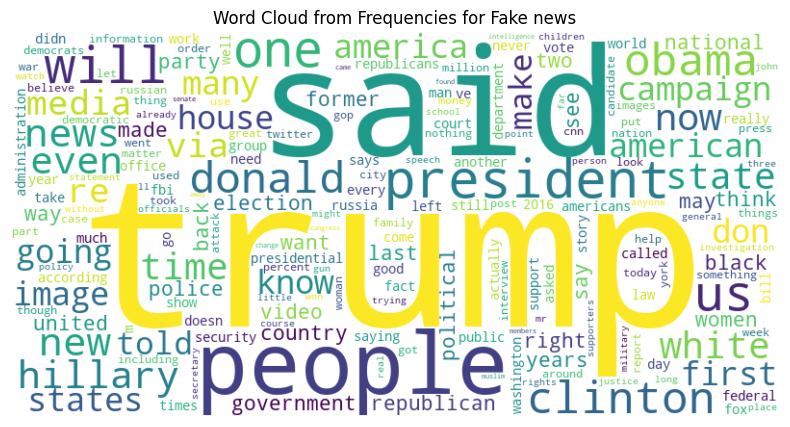

In [116]:
word_cloud_gen(fake_dict,'Fake')

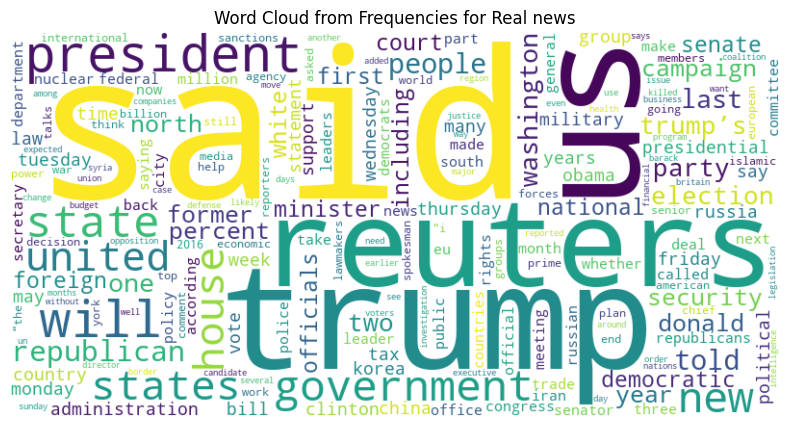

In [117]:
word_cloud_gen(real_dict,'Real')